# Digitos de regresion logistica

In [49]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [50]:
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

/home/jorge/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [51]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [52]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [53]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
mnist['data'].shape


(70000, 784)

In [55]:
mnist['data'][0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [56]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [57]:
mnist['target'].shape

(70000,)

In [58]:
X, y = mnist['data'], mnist['target']

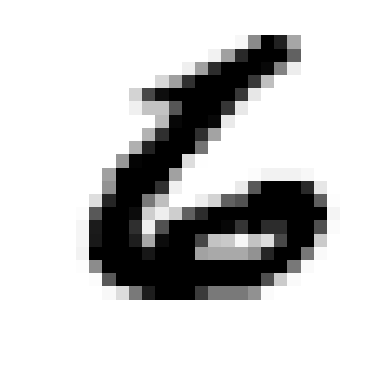

In [59]:
single_digit = X[69999]
sinfle_digit_image = single_digit.reshape(28, 28)

plt.imshow(sinfle_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [60]:
def plot_images_matrix (images, image_size, images_per_row):
    images = [image.reshape(image_size, image_size) for image in images]

    n_rows = (len(images) -1 ) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))

    row_images = []

    for row in range(n_rows):
        r_images = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(r_images, axis = 1))
    
    image = np.concatenate(row_images, axis = 0)

    plt.imshow(image, cmap = 'binary')
    plt.axis('off')
    plt.show()

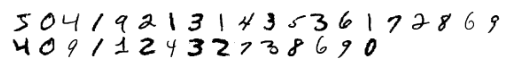

In [61]:
plot_images_matrix(X[:35], 28, 20)

Hay que recordar que la base de datos contiene la intensidad respecto a la escala de grises de un pixel pero en formato string, por lo que es necesario corregir dicho tipo

In [62]:
y = y.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [64]:
from sklearn.linear_model import SGDClassifier

In [65]:
y_train_for_5 = y_train == 5

In [66]:
model = SGDClassifier(loss = 'log', random_state = 55)

In [67]:
model.fit(X_train, y_train_for_5)

/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=55)

In [68]:
model.predict(X_test[15:30])

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False])

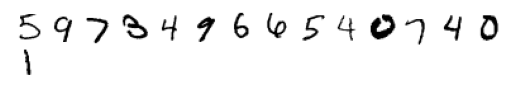

In [69]:
plot_images_matrix(X_test[15:30], 28, 14)

## Validación cruzada

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_val_score(model, X, y == 5, cv = 3, scoring = 'accuracy')

/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


array([0.96687238, 0.92825612, 0.95328505])

## Definicion de propia clase y modelo de predicción

In [72]:
from sklearn.base import BaseEstimator

In [73]:
class Never5Classifier (BaseEstimator):
    def fit(self, X, y=None): return self
    def predict(self, X): return np.zeros((len(X), 1), dtype = int)

In [74]:
never5Clasifier = Never5Classifier()
cross_val_score(never5Clasifier, X, y == 5, cv=3, scoring = 'accuracy')

array([0.91137396, 0.9087987 , 0.90927013])

In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [79]:
y_only5_predicted = cross_val_predict(model, X, y == 5, cv = 3)

/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## Matriz de confusion

In [80]:
matrix1123 = confusion_matrix(y == 5, y_only5_predicted)
matrix1123

array([[60953,  2734],
       [  803,  5510]])

In [83]:
from sklearn.metrics import precision_score, recall_score

In [85]:
#Recall
print((5510)/(5510 + 803))

0.8728021542848091


In [86]:
#Precison
recall = 5510 /(5510+2734)
print(recall)

0.66836487142164


In [87]:
recall_score(y == 5, y_only5_predicted)

0.8728021542848091

In [88]:
precision_score(y == 5, y_only5_predicted)

0.66836487142164

$$
    Precision = \frac{TP}{TP + FP}
$$
$$
    Recall = \frac{TP}{TP + FN}
$$

$$
F_1 = \frac{1}{\frac{1}{Precision} + \frac{1}{recall}} = \frac{TP}{TP + \dfrac{FN + FP}{2}}
$$

In [89]:
from sklearn.metrics import f1_score

In [90]:
f1_score(y == 5, y_only5_predicted)

0.757024112111012